# IMDB Data Analysis - Vishra Thakkar and Giselle Yim


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

imdb = pd.read_csv("imdb_dataset.csv")

### 1. What is the average runtime (in minutes) of all the movies?

In [9]:
dataset = imdb.loc[:, "Runtime (Minutes)"]
filtered_dataset = dataset.dropna()

sum = 0
total_num = len(filtered_dataset)
for i in filtered_dataset:
  sum += i
avg = sum / total_num 

print(f"The average runtime of all movies is: {int(avg)} minutes")

The average runtime of all movies is: 107 minutes


### Discussion:
To find the average runtime of all the movies in the data set, the "Runtime (Minutes)" column is selected and filtered out using the .dropna() function which drops all missing values for runtimes before calculating the average. The len() function gives the total number of rows in the filtered data set; total number of movies. The for loop iterates through each row in the "Runtime (Minutes)" column, adding the runtime to the sum of all runtimes. The average runtime is calculated through dividing the sum of runtimes of all movies by the total number of movies. The print statement is formatted in a way which drops the decimal numbers of the average runtime, making it an integer. 

The average runtime of all the movies is 107 minutes, indicating that movies tend to be around 107 minutes long. The duration could reflect audience preferences as they may prefer more shorter and concise movies, making 1 hour 40 minutes the industry standard for movie length. Also, production constraints may also reflect this as longer movies would require more resources and time. 

### 2. Which genres feature in the highest and lowest number of movies?

In [10]:
dataset = imdb.loc[:, ["Title", "Main Genres"]]
filtered_dataset = dataset.dropna()


genre_dict = {}
for i in filtered_dataset.T:
  genre_data = filtered_dataset.loc[i, "Main Genres"].split(",")
  for x in range(len(genre_data)):
    if genre_data[x] in list(genre_dict.keys()):
      genre_dict[genre_data[x]].append(filtered_dataset.loc[i, "Title"])
    else:
      genre_dict[genre_data[x]] = [filtered_dataset.loc[i, "Title"]]

highest = len(genre_dict["Action"])
highest_genre = "Action"
for key in genre_dict:
  if len(genre_dict[key]) > highest:
    highest = len(genre_dict[key])
    highest_genre = key

lowest = len(genre_dict["Action"])
lowest_genre = "Action"
for key in genre_dict:
  if len(genre_dict[key]) < lowest:
    lowest = len(genre_dict[key])
    lowest_genre = key

print(f"Genre: {highest_genre}")
print(f"Number of movies featured in: {highest}")

print(f"Genre: {lowest_genre}")
print(f"Number of movies featured in: {lowest}")

Genre: Drama
Number of movies featured in: 4757
Genre: Film-Noir
Number of movies featured in: 43


### Discussion:
To find which genres feature in the highest and lowest number of movies, the "Titles" and "Main Genres" columns are selected as the data set and filtered out to remove any missing values for genres; the .dropna() function is used. The for loop iterates through every row in the selected columns and separates the genres of each movie. Each new genre is added to a dictionary where the genre is the key which and the value is a list of the movies that the genre features in. Next, for loops iterate through each key in the dictionary to find the length of the list of its value; len() function is used to find the number of movies that each genre (each key in genres_dict) features in. This helps us find the genre that is featured in highest number of movies and the genre that is featured in the lowest number of movies.

The results indicate popularity of genres amongst the audience, where Drama is featured in the highest number of movies and Film-Noir is featured in the lowest number of movies. Drama can be considered a highly popular genre amongst the audience due to its movies having engaging and entertaining plots, attracting a larger audience. However with Film-Noir, many may not prefer to watch movies with plots surrounding things like crime, pessimism and disillusionment; attracting a more niche audience. The popularity of genres can influence the industry to implement more production of movies that appeal to the audience by genre, increasing the chances of the movie being commercially successful. 

### 3. Does a high gross revenue always mean a high rating for a movie?

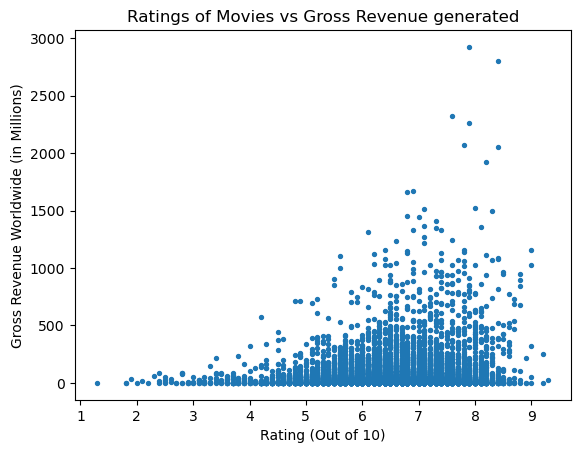

In [13]:
rating = []
revenue = []

dataset = imdb.loc[:, ["Rating (Out of 10)", "Gross worldwide (in millions)"]]

filtered_dataset = dataset.dropna()

for i in filtered_dataset['Rating (Out of 10)']:
  rating.append(i)

for i in filtered_dataset['Gross worldwide (in millions)']:
  revenue.append(i)

plt.scatter(rating, revenue, s=8)
plt.xlabel("Rating (Out of 10)")
plt.ylabel("Gross Revenue Worldwide (in Millions)")
plt.title("Ratings of Movies vs Gross Revenue generated")
plt.show()

### Discussion:

Using Matplotlib, we can plot a scatter plot of Movie Ratings vs. Gross Revenue generated. This will make the results easier to visualize due to the large number of data points. However, we noticed that the data set contained some missing values in the desired columns, thus we used the .dropna() function to drop missing values. Once the data set was filtered out, each value in the "Rating (Out of 10)" column was appended to a list of the X values; Rating (Out of 10). The same was done for the Y values; Gross Revenue Worldwide (in Millions). Next, the plt.scatter() function was used to plot a scatter plot of the x and y values. Functions plt.xlabel() and plt.ylabel() were used in labelling the axis for clarity. Lastly, the plt.show() function was used to display the plot once we run the code.

Looking at the scatter plot, it is evident that a low rating tends to decrease the chances of a movie generating high revenue. However, a high rating does not always guarantee high revenue. This pattern is noticeable for movies with ratings between 5 and 8, where there is a high frequency and clutter of data points between the range 0 to 500 million USD. This indicates that most movies seem to generate similar revenues regardless of a higher rating, for example a movie rated 5 out 10 generates about 400 million USD whilst a movie rated 8 out 10 also seems to generate the same amount. There is a lower frequency and clutter of data points between the range 500 million to 3 billion USD where the revenue generated seems to increase as rating increases. Yet, the revenues generated for movies rated 8 and above seem to gradually decrease, this is because critique ratings are objective and higher ratings do not necesarily indicate the movie being a popular watch amongst audiences due to limited releases or niche audiences. Overall, the scatter plot reveals a weak positive correlation between movie ratings and revenue generated. 

### 4. How many movies were released in each year from 2010 - 2023?

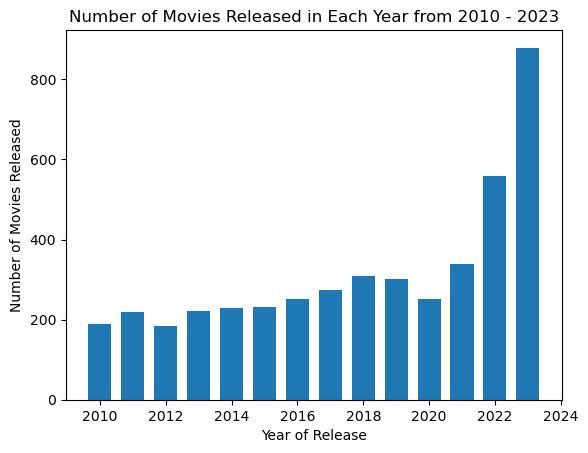

In [14]:
years = list(range(2010, 2024))
release_nums = []
for year in years:
  count = 0
  for i in range(len(imdb)):
    if imdb.loc[i, "Release Year"] == float(year):
      count += 1
  release_nums.append(count)

plt.bar(years, release_nums, width=0.7)

plt.xlabel("Year of Release")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movies Released in Each Year from 2010 - 2023")

plt.show()

### Discussion:
Using matplotlib we can plot a bar chart displaying the number of movies released in each year from 2010 to 2023. The bar chart helps organize and visualize the data in the "Release Year" column as it is not sorted in the data set. To plot the chart, we set the X values to be the range of the years 2010 - 2023. A for loop is used to iterate through every year in the range, then a nested for loop is used to iterate through every row by index. Next, subsetting through .loc[] is used to locate the desired cell; current row of the "Release year" column. The conditional statement is used to check if the release year matches the specific year in the range and thus increases the count to keep track of the number of movies released in that specific year. This creates the release_nums list which represents the Y values respective of each X value. Lastly, the plt.plot() function is used with three arguments: X values, Y values and width of bars. This plots the bar chart that is formatted further using functions for labelling. 

The bar chart produced shows a noticeable dip in the number of movies released during the year 2020. A reason for this could be the occurence of the pandemic Covid and its safety measures that had to be taken globally. This led to a delay in the dates of movie releases since movie productions at the time had to abide by the restrictions and stop operations. Moreover, there is an evident surge in the number of movies released during 2022 and 2023. A reason for this can be the previous delay in movie releases during Covid, leading to movie releases being pushed back to after Covid. 